In [1]:
import os
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt
import pickle

c:\Users\Alan\.conda\envs\network\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [32]:
with open(os.path.join("data","restaurants.p"), "rb") as f:
    restaurants = pickle.load(f)

edges_to_remove = [e for e in restaurants.edges if restaurants.edges[e]["weight"] <= 3]
restaurants.remove_edges_from(edges_to_remove)
nodes_to_remove = [e[0] for e in restaurants.degree if e[1] == 0]
restaurants.remove_nodes_from(nodes_to_remove)

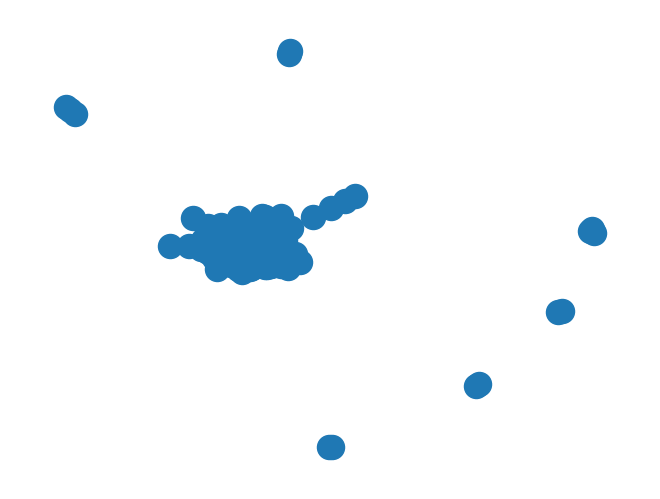

In [33]:
nx.draw(restaurants)

## Compute degree centrality

We add the degree centrality to each of the nodes

In [34]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(restaurants)
for n in restaurants.nodes():
    restaurants.nodes[n]['centrality'] = dcs[n]

## Circos plot

We create a CircosPlot

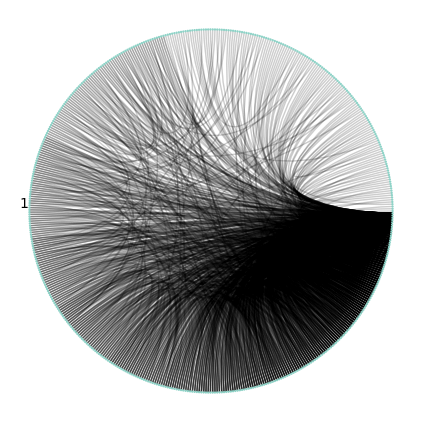

In [35]:
import nxviz as nv
from nxviz import annotate

c = nv.circos(restaurants,node_color_by='bipartite',group_by='bipartite',sort_by='centrality')

# Draw c to the screen
nv.annotate.circos_group(restaurants, group_by="bipartite")
plt.tight_layout(rect=(0.05, 0.05, 0.95, 0.95))
plt.show()

In [39]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G,partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(restaurants, 1)))

503


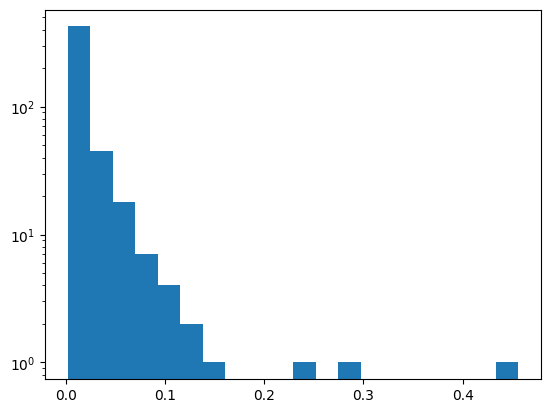

In [42]:
# Get the 'users' nodes: user_nodes
one_nodes = get_nodes_from_partition(restaurants,1)

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(restaurants)

# Get the degree centralities for user_nodes: user_dcs
one_dcs = [dcs[n] for n in one_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(one_dcs, bins=20)
plt.show()